## Kmeans

In [1]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings

warnings.filterwarnings("ignore")

In [3]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], dtype=np.float64)

In [4]:
data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype=np.float64)

In [5]:
data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], dtype=np.float64)

In [6]:
data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

In [7]:
data.shape

(150, 2)

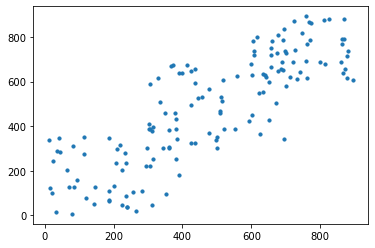

In [8]:
plt.scatter(data[:, 0], data[:, 1], s = 10)

In [9]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])

In [10]:
labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [11]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df = pd.DataFrame({'data_x': data[:, 0], 'data_y': data[:, 1],
                    'labels': labels})

In [13]:
df.sample(10)

,data_x,data_y,labels
82,622.0,549.0,1
49,305.0,220.0,0
27,313.0,255.0,0
37,71.0,126.0,0
77,499.0,301.0,1
134,864.0,791.0,2
76,382.0,389.0,1
141,697.0,735.0,2
58,302.0,412.0,1
9,142.0,50.0,0


In [14]:
colors = ['green', 'blue', 'purple']

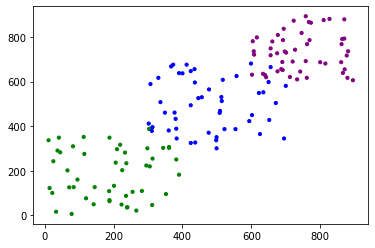

In [16]:
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s = 10, 
            cmap = matplotlib.colors.ListedColormap(colors))

In [17]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [18]:
kmeans_model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
centroids = kmeans_model.cluster_centers_

In [20]:
centroids

array([[173.34090909, 173.34090909],
       [727.51724138, 712.39655172],
       [434.70833333, 458.3125    ]])

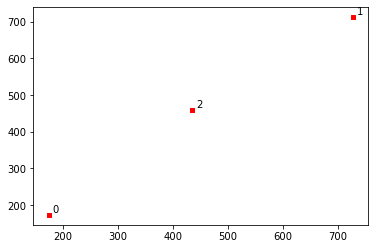

In [21]:
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=10, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=10)

In [22]:
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))

Homogeneity_score:  0.7490532363800495


In [23]:
print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))

Completeness_score:  0.7537379689969089


In [24]:
print("V_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))

V_measure_score:  0.7513883007028098


In [25]:
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))

Adjusted_rand_score:  0.7471056812697586


In [26]:
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))

Adjusted_mutual_info_score:  0.7482662085352955


In [27]:
print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Silhouette_score:  0.4982331219987113


In [28]:
kmeans_model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
colors = ['green', 'blue', 'purple']

In [30]:
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

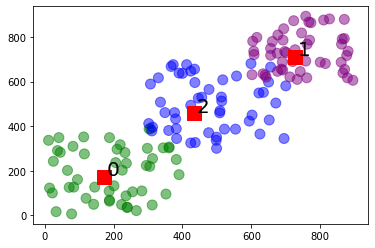

In [37]:
plt.scatter(df['data_x'], df['data_y'], c = df['labels'], s = 100,
    cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='r',
            s = 200, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [38]:
data_test = np.array([[442, 621],
                      [50, 153],
                      [333, 373],
                      [835, 816]])

In [39]:
label_predict = kmeans_model.predict(data_test)

In [40]:
label_predict

array([2, 0, 2, 1])

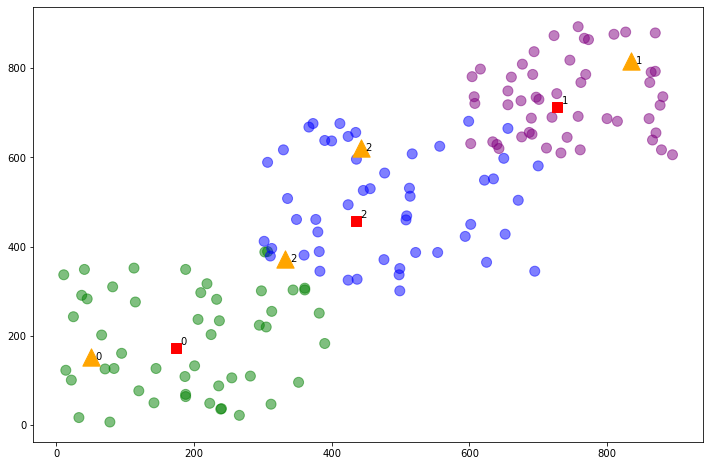

In [44]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c = df['labels'], s = 100,
            cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)


plt.scatter(data_test[:, 0], data_test[:, 1], c = 'orange', s = 300, marker='^')

for i in range(len(label_predict)):
    plt.annotate(label_predict[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize = 10)

plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', s = 100, marker='s')


for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=10)